<a href="https://colab.research.google.com/github/xr-cc/proj-hsg-env-chal/blob/master/code/explore_income_seismic_CES3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratary analysis of CES3 Bay Area data, with income and seismic



In [1]:
! pip install geopandas
! pip install descartes

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 15.3MB/s 
     |████████████████████████████████| 14.8MB 308kB/s 


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib import colors

In [4]:
# grant access to Google Drive
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [6]:
os.listdir("/content/drive/My Drive/DS4A/")

['DS4A_Team 31']

In [7]:
# load data

dataPath = "/content/drive/My Drive/DS4A/DS4A_Team 31/data/CES3/"
xls = pd.ExcelFile(dataPath+"CES3, income, seismic - Bay Area.xlsx")
sheets = xls.sheet_names
print(sheets)


['CES 3.0 (2018 Update)', 'Income cutoffs per county', 'Data Dictionary', 'Missing&NAData', 'Demographic profile']


In [19]:
# load dataframes

df = pd.read_excel(xls, sheet_name=sheets[0])
df_dict = pd.read_excel(xls, sheet_name=sheets[2],skiprows=range(0,6)).dropna(thresh=2)
df_demo = pd.read_excel(xls, sheet_name=sheets[4], header=None,
                        names=['Census Tract','CES 3.0 Score','CES 3.0 Percentile','CES 3.0 Percentile Range','Total Population',
                               'California County','Age:<10','Age:11-64','Age:>65', 'Race:Hispanic','Race:White','Race:AfricanAmerican',
                               'Race:NativeAmerican','Race:Aisan','Race:Other'],skiprows=[0]).dropna()

df_dict_temp = df_dict.dropna()

# load geo dataframe
gdf = gpd.read_file(dataPath+"CES3June2018Update.shp")
gdf = gdf[gdf['tract'].isin(df['Census ID'])].reset_index(drop=True).rename(columns={'tract': 'Census ID'})

# join dataframes
gdf = gdf.merge(df, on='Census ID')

In [9]:
gdf.head()

,Census ID,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,ozoneP,pm,pmP,diesel,dieselP,drink,drinkP,pest,pestP,RSEIhaz,RSEIhazP,traffic,trafficP,cleanups,cleanupsP,gwthreats,gwthreatsP,haz,hazP,iwb,iwbP,swis,swisP,Pollution,PollutionS,PollutionP,asthma,asthmaP,lbw,lbwP,...,pov,povP,unemp,unempP,housingB,housingBP,PopChar,PopCharSco,PopCharP,Children_u,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl
0,6.085509e+09,4603,Santa Clara,94043,Mountain View,-122.074346,37.401206,19.89,38,0.035,17,9.96,43,28.58,83,277.40,29,0.000,0,252.02,40,1230.83,76,66.5,98,121.85,98,0.20,61,5,55,0.0,0,48.16,5.93,67,20.70,9,4.77,46,...,10.5,8,9.9,55,21.5,65,32.34,3.35,23,9.7,80.2,10.1,18.4,46.8,2.7,0.3,27.2,4.6,5110,4,8,5862.187357,1.581581e+06,35-40%,"POLYGON ((-182852.281 -67226.673, -182870.875 ...",20.70,8.839297,4.77,45.802896,6.48,30.270540,5.0,19.707292,4.6,33.902146,10.5,9.9,55.298896,21.5,65.143437
1,6.085510e+09,4688,Santa Clara,94022,Los Altos,-122.120112,37.392783,3.53,1,0.035,17,9.96,43,19.90,61,465.27,48,0.056,16,202.20,36,566.07,38,6.9,50,17.10,66,0.06,28,0,0,0.0,0,34.30,4.23,30,9.01,0,2.63,6,...,5.8,2,3.5,4,15.7,38,8.07,0.84,1,12.9,61.0,26.1,2.6,72.4,0.4,0.0,20.9,3.6,7893,1,1,7610.538985,2.592144e+06,1-5% (lowest scores),"POLYGON ((-186882.009 -66430.601, -186916.298 ...",9.01,0.423887,2.63,5.549148,3.43,1.882558,2.4,7.418622,2.2,15.677910,5.8,3.5,4.251809,15.7,38.461538
2,6.085509e+09,3212,Santa Clara,94306,Palo Alto,-122.114454,37.406981,7.97,8,0.035,17,9.54,41,23.86,73,491.91,52,0.000,0,205.50,37,633.51,45,5.3,45,16.50,65,0.00,0,0,0,0.0,0,32.50,4.00,26,9.79,1,3.75,21,...,15.2,17,5.2,14,15.8,39,19.21,1.99,7,11.9,79.6,8.5,15.9,41.1,2.2,0.2,37.7,2.9,7475,1,2,3401.365567,6.661267e+05,5-10%,"POLYGON ((-186342.464 -65548.645, -186507.620 ...",9.79,0.610896,3.75,20.889402,3.16,1.009849,3.8,14.042392,13.4,70.590588,15.2,5.2,14.151542,15.8,39.083524
3,6.085509e+09,3706,Santa Clara,94043,Mountain View,-122.092278,37.406030,17.20,31,0.035,17,9.54,41,23.86,73,277.40,29,0.000,0,225.06,39,493.52,30,44.2,95,30.85,82,0.02,16,4,49,0.0,0,37.86,4.66,39,21.29,10,3.85,23,...,29.3,44,7.3,32,17.1,46,35.56,3.69,28,10.4,70.8,18.8,24.4,42.7,2.7,0.1,26.1,4.0,5496,4,7,3211.309410,5.758547e+05,30-35%,"POLYGON ((-184858.846 -66420.547, -185397.071 ...",21.29,9.712006,3.85,22.952710,6.69,33.038275,10.4,40.625789,19.7,83.922144,29.3,7.3,32.097982,17.1,45.925362
4,6.085503e+09,4311,Santa Clara,95122,San Jose,-121.822135,37.331408,32.60,64,0.038,22,10.37,53,26.11,79,639.64,72,0.000,0,175.02,33,915.85,63,4.5,42,3.00,22,0.10,43,0,0,0.0,0,37.84,4.66,39,56.72,65,5.34,62,...,31.5,47,12.9,76,17.5,48,67.45,7.00,76,15.2,75.5,9.3,62.2,3.7,1.5,0.2,31.2,1.1,3123,7,13,5951.985625,1.670329e+06,60-65%,"POLYGON ((-160742.128 -73973.529, -160380.770 ...",56.72,65.178905,5.34,61.771114,10.84,81.885052,34.2,81.112793,15.1,74.656712,31.5,12.9,75.517198,17.5,47.994415


In [10]:
df.head()

,County,Census Tract,"Percentage of households with income Less than $50,000","Less than $60,000","Less than $75,000","Less than $100,000",Census ID,Census Tract.1,Total Population,Unnamed: 9,California County,ZIP,Nearby City \n(to help approximate location only),SEISMIC PGA,Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,Alameda,4507.5,18.7,21.6,27.2,40.0,6001450750,7.5,3618,NaN,Alameda,94568,Dublin,NaN,-121.861115,37.705340,11.822367,17.164838,15-20%,No,0.037785,22.339764,8.697944,30.701098,41.100000,93.789670,168.154737,10.589996,0.0,0.0,217.013957,37.715141,2571.12,95.538288,0.0,0.000000,0.00,0.000000,0.0,0.00000,2,29.250497,0.0,0.000000,29.633267,3.650018,18.817673,31.79,28.363047,4.01,26.438549,7.60,45.119062,8.1,32.576331,8.1,51.699773,17.2,20.892520,3.2,3.160300,15.5,37.458746,31.232210,3.238988,21.755581
1,Alameda,4001.0,13.6,19.2,21.9,28.4,6001400100,4001.0,2937,NaN,Alameda,94704,Berkeley,NaN,-122.231903,37.867595,3.970573,1.866566,1-5% (lowest scores),No,0.029592,7.579340,8.697944,30.701098,27.436933,80.958307,70.599583,4.465511,0.0,0.0,485.311211,50.299327,929.74,64.018047,4.5,42.174389,4.05,27.077127,6.0,97.81279,2,29.250497,1.0,32.798868,37.942971,4.673549,39.688861,18.50,6.308440,2.99,8.676150,3.01,0.723102,1.7,4.277063,3.8,28.622850,7.6,3.570082,NaN,NaN,8.5,8.123889,8.192184,0.849584,0.819776
2,Alameda,4002.0,10.3,15.2,22.5,28.8,6001400200,4002.0,1974,NaN,Alameda,94618,Oakland,NaN,-122.249576,37.848171,1.810257,0.252239,1-5% (lowest scores),No,0.029592,7.579340,8.697944,30.701098,42.190000,94.399502,70.599583,4.465511,0.0,0.0,442.468040,48.852582,1392.34,80.574007,0.0,0.000000,20.55,71.714664,0.0,0.00000,0,0.000000,0.0,0.000000,30.168791,3.715980,20.124456,24.27,14.636579,1.24,0.435730,3.98,4.525620,1.5,3.419127,0.0,0.000000,11.2,8.988058,2.2,1.129585,4.0,0.774308,4.697429,0.487155,0.063060
3,Alameda,4003.0,27.2,31.2,38.5,52.1,6001400300,4003.0,4865,NaN,Alameda,94618,Oakland,NaN,-122.254436,37.840598,12.041135,17.631479,15-20%,No,0.029592,7.579340,8.697944,30.701098,42.190000,94.399502,70.599583,4.465511,0.0,0.0,426.127435,48.291344,1207.30,75.410452,0.9,12.860270,35.25,85.187024,0.0,0.00000,0,0.000000,0.0,0.000000,31.379081,3.865055,22.962041,37.93,38.311931,4.13,29.232347,4.42,7.505299,5.0,19.707292,8.9,54.939341,14.3,14.833438,8.8,45.970301,16.0,39.870526,30.040353,3.115385,20.267373
4,Alameda,4004.0,26.2,27.7,33.1,45.9,6001400400,4004.0,3703,NaN,Alameda,94609,Oakland,NaN,-122.257463,37.848211,10.912634,15.020810,15-20%,No,0.029592,7.579340,8.697944,30.701098,42.190000,94.399502,70.599583,4.465511,0.0,0.0,444.957438,48.964829,1153.54,73.680912,0.0,0.000000,38.75,87.040715,0.0,0.00000,0,0.000000,0.0,0.000000,30.544733,3.762286,20.883634,60.86,69.928937,3.98,25.759323,4.89,11.569630,6.1,24.287156,2.3,16.651113,16.8,19.949717,3.3,3.553750,15.3,36.481340,27.968623,2.900533,17.379241


In [16]:
# get only the population characterics columns
income_col = df.columns[2:6]
popchar_col = df_dict_temp[df_dict_temp['CalEnviroScreen Category'].str.contains('Population')]['Variable Name'].drop_duplicates()
popchar_col = [v.rstrip() for v in popchar_col]
polbur_col = df_dict_temp[df_dict_temp['CalEnviroScreen Category'].str.contains('Pollution')]['Variable Name'].drop_duplicates()
polbur_col = [v.rstrip() for v in polbur_col]
seismic_col = 'SEISMIC PGA'

In [17]:
df_income = df[income_col]
df_income.head()

,"Percentage of households with income Less than $50,000","Less than $60,000","Less than $75,000","Less than $100,000"
0,18.7,21.6,27.2,40.0
1,13.6,19.2,21.9,28.4
2,10.3,15.2,22.5,28.8
3,27.2,31.2,38.5,52.1
4,26.2,27.7,33.1,45.9


In [18]:
df_seismic = df[seismic_col]
df_seismic.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: SEISMIC PGA, dtype: float64

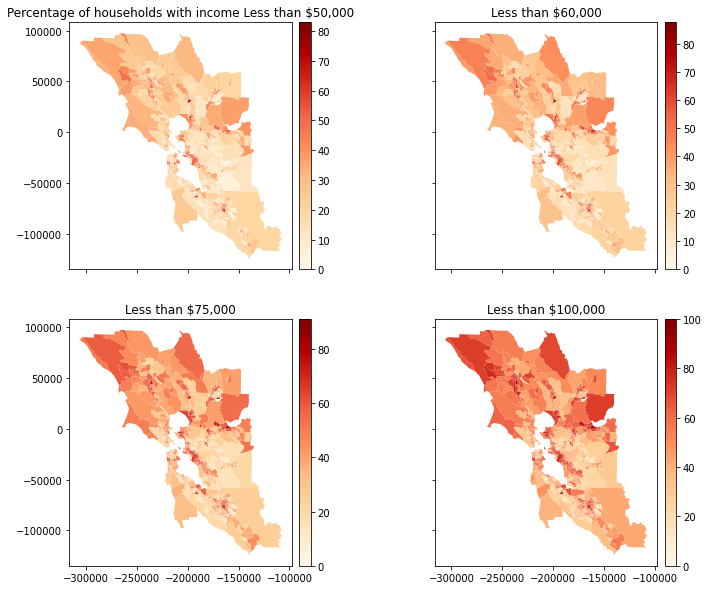

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12,10),sharex=True, sharey=True, squeeze=True)
for i,feature in enumerate(income_col):
  ax = axs[int(i/2),i%2]
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.1)
  gdf.plot(ax=ax, cax=cax, column=feature,cmap='OrRd', legend=True, figsize=(8,8))
  ax.set_title(feature)
  # plt.xlabel("Longitude")
  # plt.ylabel("Latitude")
  # plt.show()
  pass
# fig.savefig(savePath+"demo_totpop.png",bbox_inches='tight')
# fig.savefig(savePath2+"demo_totpop.png",bbox_inches='tight')

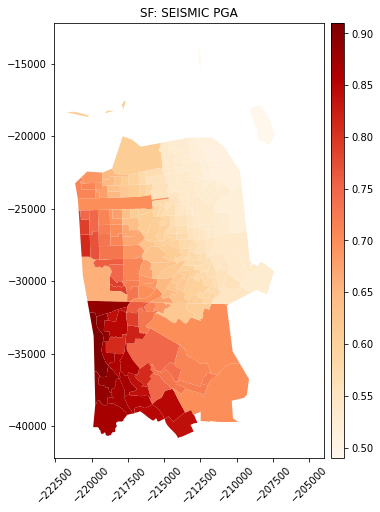

In [33]:
feature = seismic_col
fig, ax = plt.subplots(figsize=(8,8),)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(ax=ax, cax=cax, column=feature,cmap='OrRd', legend=True, figsize=(8,8))
ax.set_title("SF: "+feature)
ax.xaxis.set_tick_params(rotation=45)